# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

## Setup

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

## Q1

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables? 
2. Why do trees tend to overfit, and how can this tendency be constrained? 
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

### Q1.1

1. The Gini Impurity index is a good loss function for categoricals because the goal of it is to find the most pure by calculation of categorical impurity within a group. That ends up being a really good loss function because for classification tasks we want to have the best means of identifying/discriminating what the best category would be, so calculating impurity and splitting on the most pure features would lead to this since we would be aiming for the best purity in splits (and thus the best identification/discrimination).

2. Trees tend to overfit when you do not limit their depth. This is because ultimately a tree that has no limitation can just split as many times as it needs to until it eventually "learns" your entire training dataset (which is the definition of overfitting since it can no longer generalize well). This tendency can again be trained by limiting the depth of the tree and thereby forcing it to no remember your whole train set.

3. False - they can work well in situations without lots of categoricals as features/covariates, and they can work well with numericals too.

4. So I'm gonna answer this question based on what I remember from my CS machine learning class. First of all, as far as I know you can get the same results from a binary split only tree as a multi-split tree (because all you'd do is binary split on one split, and then you'd binary split on the other thing you wanted to split on - mimicking a multi-split). Another thing is that although it might make more sense for categoricals (i.e. let's say for instance, we wanted to split and make nodes on whether the weather is clear, sunny, or windy), for numericals it becomes a little bit more convoluted to have to calculate the optimal "splits" (i.e. you'd have to calculate the entropy multiple times to find the optimal). Lastly, and now that I think about it, you can't actually compute the Gini index on non-binary splits (which isn't necessarily an issue since we have entropy) but the point is this might be another reason why.

5. One of the best heuristic ways to examine a tree (just look at it) and determine whether it is overfitting in particular is, does it have a ton of depth/leafs/splits? If it does, it might be splitting too much (and thus, "memorizing" the data by splitting on every pattern rather than just getting the best optimized splits). One way to tell if a tree is underfitting is the opposite - if there is not too much depth/leafs/splits it might indicate that the tree did not capture the necessary granularity necessary to capture the optimal classification split.

## Q2

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

### Q2.1

In [118]:
breast_cancer_df = pd.read_csv('./data/Breast Cancer METABRIC.csv')
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

So there are 2509 observations, and 34 variables!

In [119]:
breast_cancer_df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


### Q2.2

Ok. Let's do it.

In [120]:
num_features = breast_cancer_df[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']]
cat_features = breast_cancer_df[['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']]

one_hot = pd.get_dummies(cat_features, drop_first=True) # something something dummy trap
X = pd.concat([num_features, one_hot], axis=1)

X.head()

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_Yes,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,1.0,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,2.0,True,False,True,False,False,False,False,False
3,25.0,3.0,47.68,2.0,True,False,False,False,False,True,False,False
4,40.0,8.0,76.97,2.0,True,False,False,False,False,True,False,False


### Q2.3

Yeah. I'm just gonna drop them if I'm being real.

In [121]:
survival_labels = breast_cancer_df['Overall Survival Status']
temp_join = pd.concat([X, survival_labels], axis=1)
temp_join = temp_join.dropna(subset=['Overall Survival Status'])
X = temp_join.drop(columns=['Overall Survival Status'])
y = temp_join['Overall Survival Status']
X.head()

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_Yes,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,1.0,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,2.0,True,False,True,False,False,False,False,False
3,25.0,3.0,47.68,2.0,True,False,False,False,False,True,False,False
4,40.0,8.0,76.97,2.0,True,False,False,False,False,True,False,False


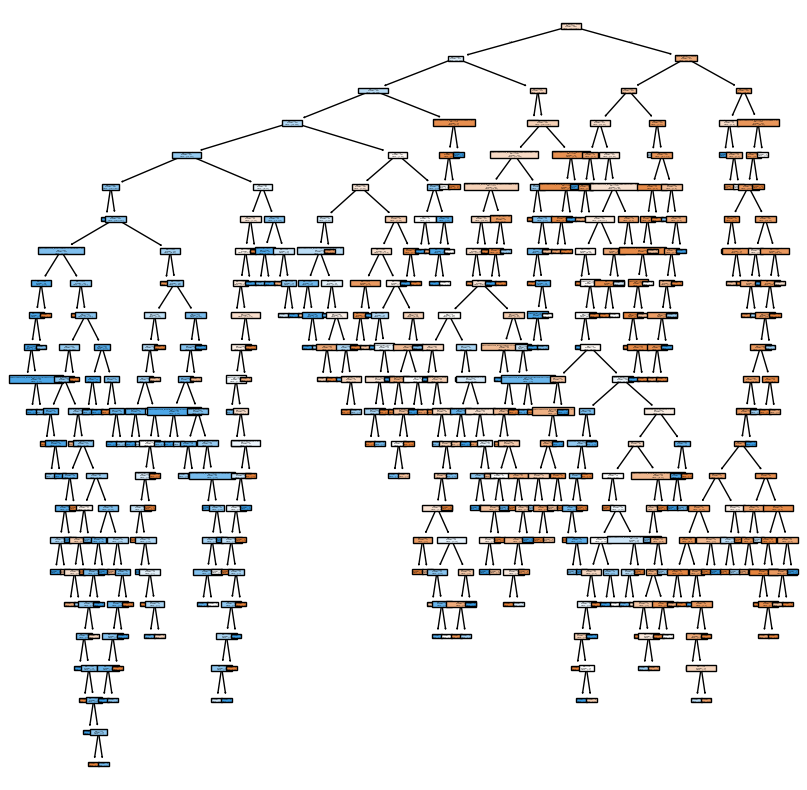

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250113)
tree_classifier = DecisionTreeClassifier(min_samples_split=10, random_state=250113)
tree_classifier = tree_classifier.fit(X_train, y_train)

plt.figure(figsize=(10,10))
var_names = tree_classifier.feature_names_in_
plot_tree(tree_classifier, filled=True, feature_names=var_names)
plt.show()


Oh my god that might be overfitting to the moon. Let's see. I know it's out of scope for this assignment but I'm just gonna go ahead and calculate the train accuracy here just to see.

In [123]:
# i literally copy pasted this from the ipynb LMFAO
y_hat = tree_classifier.predict(X_train)
train_tab = pd.crosstab(y_train, y_hat) # Compute confusion matrix
train_acc = np.trace(train_tab)/len(y_train) # Faster way to compute accuracy
print('Train Accuracy: ', train_acc, '\n')
train_tab

Train Accuracy:  0.8781565656565656 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,841,83
Living,110,550


OK. It's not the craziest overfitting actually. We carry on.

In [124]:
y_hat = tree_classifier.predict(X_test)
test_tab = pd.crosstab(y_test, y_hat) # Compute confusion matrix
test_acc = np.trace(test_tab)/len(y_test) # Faster way to compute accuracy
print('Test Accuracy: ', test_acc, '\n')
test_tab

Test Accuracy:  0.6095717884130982 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,146,74
Living,81,96


Although, that's concerning and would definitely suggest that there is some overfitting... since the difference between train/test is so much. Meh, is what it is.

### Q2.4

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?


...three? FYI I was so baffled when I saw three that I was like, am I misreading this?

In [125]:
test_tpr = test_tab.iloc[1,1] / (test_tab.iloc[1,1] + test_tab.iloc[1,0])
test_tpr

np.float64(0.5423728813559322)

In [126]:
test_tnr = test_tab.iloc[0,0] / (test_tab.iloc[0,0] + test_tab.iloc[0,1])
test_tnr

np.float64(0.6636363636363637)

So, TNR is a little bit higher than TPR. What that means is just that the model does better when predicting true negative cases (deceased) than true positive cases (living).

### Q2.5

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

OK.

In [127]:
breast_cancer_df['Overall Survival (Months)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2509 entries, 0 to 2508
Series name: Overall Survival (Months)
Non-Null Count  Dtype  
--------------  -----  
1981 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


Same issue as the other one. We gotta drop these.

In [128]:
num_features = breast_cancer_df[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']]
cat_features = breast_cancer_df[['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']]

one_hot = pd.get_dummies(cat_features, drop_first=True)
X = pd.concat([num_features, one_hot], axis=1)
survival_labels = breast_cancer_df['Overall Survival (Months)']
temp_join = pd.concat([X, survival_labels], axis=1)
temp_join = temp_join.dropna(subset=['Overall Survival (Months)'])
X = temp_join.drop(columns=['Overall Survival (Months)'])
y = temp_join['Overall Survival (Months)']
X.head()

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_Yes,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,1.0,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,2.0,True,False,True,False,False,False,False,False
3,25.0,3.0,47.68,2.0,True,False,False,False,False,True,False,False
4,40.0,8.0,76.97,2.0,True,False,False,False,False,True,False,False


In [129]:
y.head()

0    140.500000
1     84.633333
2    163.700000
3    164.933333
4     41.366667
Name: Overall Survival (Months), dtype: float64

Now, I'll assume by "pick the optimal min_samples_leaf" you guys meant, just try random values til it works. So I'll do from a range of [2, 200] cause why not!

In [134]:
best_min_samples_leaf = None
best_rsq = 0
best_model = None
best_yhat = None
for i in range(2, 201):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250113)
    tree_regressor = DecisionTreeRegressor(min_samples_leaf=i, random_state=250113)
    tree_regressor = tree_regressor.fit(X_train, y_train)
    y_hat = tree_regressor.predict(X_test)
    e = y_test - y_hat
    rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
    if best_rsq < rsq:
        best_rsq = rsq
        best_min_samples_leaf = i
        best_model = tree_regressor
        best_yhat = y_hat # saving this for later lmfao

print("Best min_samples_leaf:", best_min_samples_leaf)
print("Best R^2 on test set:", best_rsq)

Best min_samples_leaf: 103
Best R^2 on test set: 0.1256187343688443


[Text(0.5, 1.0, 'Predicted vs Actual Overall Survival (Months)'),
 Text(0.5, 0, 'Actual Overall Survival (Months)'),
 Text(0, 0.5, 'Predicted Overall Survival (Months)')]

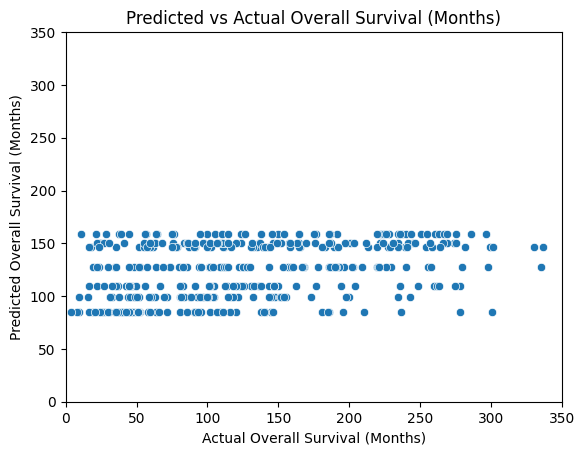

In [140]:
fig, ax = plt.subplots()
# make the axes consistent so we can see how bad the model was messing up
ax.set_xlim(0, 350)
ax.set_ylim(0, 350)
sns.scatterplot(x=y_test, y=y_hat, ax=ax).set(title="Predicted vs Actual Overall Survival (Months)", xlabel="Actual Overall Survival (Months)", ylabel="Predicted Overall Survival (Months)")

Yeah. This model is absolutely terrible and I would absolutely refrain from using it to predict anything related to the medical field. It manages to overestimate how long people have to live when in actuality they don't have a lot of time to live, and underestimates how long people have to live when in actuality they have a lot more time to live. Evidently this model is pretty terrible and doesn't accurately predict survival time, which may be critical for both staff understanding, but also patient understanding as we have an ethical code to inform patients roughly accurate times so they can do with the rest of their life what they wish.

## Q3 (i ain't do it)

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?